In [1]:
from dateutil import parser
from datetime import datetime
import numpy as np
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'svg'
%matplotlib inline


with open('turnstiles_full.pickle', 'rb') as file:
    mta = pickle.load(file)
mta.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,date_time
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,00:00:00,REGULAR,7089463,2401758,2019-06-08 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,04:00:00,REGULAR,7089491,2401764,2019-06-08 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,08:00:00,REGULAR,7089511,2401807,2019-06-08 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,12:00:00,REGULAR,7089598,2401889,2019-06-08 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,16:00:00,REGULAR,7089801,2401946,2019-06-08 16:00:00


In [2]:
with open('turnstiles_by_day.pickle', 'rb') as file:
    by_day = pickle.load(file)
by_day.head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE,PREV_ENTRIES,PREV_EXITS,weekday,daily_entries,daily_exits
1,A002,R051,02-00-00,59 ST,7063280,2393719,2019-05-18,7062481.0,2393489.0,Saturday,799.0,230.0
2,A002,R051,02-00-00,59 ST,7063983,2393895,2019-05-19,7063280.0,2393719.0,Sunday,703.0,176.0
3,A002,R051,02-00-00,59 ST,7065493,2394422,2019-05-20,7063983.0,2393895.0,Monday,1510.0,527.0
4,A002,R051,02-00-00,59 ST,7067101,2394950,2019-05-21,7065493.0,2394422.0,Tuesday,1608.0,528.0
5,A002,R051,02-00-00,59 ST,7068769,2395465,2019-05-22,7067101.0,2394950.0,Wednesday,1668.0,515.0


In [3]:
#create column for sum of daily entries and exits

by_day['total_traffic'] = by_day['daily_entries'] + by_day['daily_exits']
by_day.head()

,C/A,UNIT,SCP,STATION,ENTRIES,EXITS,DATE,PREV_ENTRIES,PREV_EXITS,weekday,daily_entries,daily_exits,total_traffic
1,A002,R051,02-00-00,59 ST,7063280,2393719,2019-05-18,7062481.0,2393489.0,Saturday,799.0,230.0,1029.0
2,A002,R051,02-00-00,59 ST,7063983,2393895,2019-05-19,7063280.0,2393719.0,Sunday,703.0,176.0,879.0
3,A002,R051,02-00-00,59 ST,7065493,2394422,2019-05-20,7063983.0,2393895.0,Monday,1510.0,527.0,2037.0
4,A002,R051,02-00-00,59 ST,7067101,2394950,2019-05-21,7065493.0,2394422.0,Tuesday,1608.0,528.0,2136.0
5,A002,R051,02-00-00,59 ST,7068769,2395465,2019-05-22,7067101.0,2394950.0,Wednesday,1668.0,515.0,2183.0


In [4]:
#Get total entry and exit traffic for each station
station_total = by_day.groupby('STATION')['total_traffic']\
.sum().reset_index().sort_values('total_traffic', ascending=False)

#Show the stations with the most total traffic
pd.options.display.float_format = '{:,.0f}'.format
station_total.head(10)

,STATION,total_traffic
61,34 ST-PENN STA,"7,429,806"
232,GRD CNTRL-42 ST,"6,210,407"
59,34 ST-HERALD SQ,"5,306,102"
14,14 ST-UNION SQ,"4,607,606"
352,TIMES SQ-42 ST,"4,605,599"
46,23 ST,"4,471,379"
225,FULTON ST,"4,071,190"
68,42 ST-PORT AUTH,"4,047,311"
110,86 ST,"3,692,913"
9,125 ST,"3,308,200"


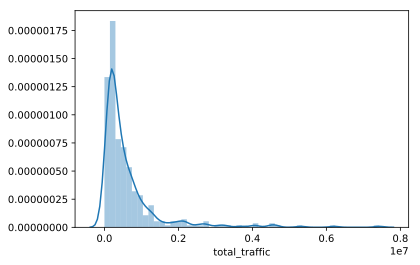

In [5]:
#Distribution and KDE of total traffic per station
sns.distplot(station_total['total_traffic'])

In [6]:
#Get list of stations with most traffic
top_stations = station_total.reset_index().iloc[:9,:]
list_of_stations = top_stations.STATION.tolist()
print(list_of_stations)

['34 ST-PENN STA', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', '14 ST-UNION SQ', 'TIMES SQ-42 ST', '23 ST', 'FULTON ST', '42 ST-PORT AUTH', '86 ST']


In [7]:
#Filter down dataframe to include only the stations with most traffic
top_by_day = by_day[by_day['STATION'].isin(list_of_stations)]

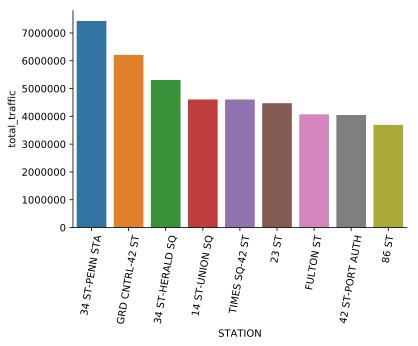

In [8]:
#Get total entry and exit traffic for top stations
top_total = top_by_day.groupby('STATION')['total_traffic']\
.sum().reset_index().sort_values('total_traffic', ascending=False)

#Show the stations with the most total traffic
bar = sns.barplot(x='STATION', y='total_traffic', data=top_total)
bar.set_xticklabels(bar.get_xticklabels(),rotation=80)
sns.despine()